# Detecting Cyberbullying in Tweets
***

In [22]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer
from time import time

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier


### Loading and Analyzing the data
***

In [23]:
df_scraped = pd.read_csv('D:/project/labeled_tweets.csv')
df_public = pd.read_csv('D:/project/public_data_labeled.csv')

In [24]:
df_scraped.drop_duplicates(inplace = True)
df_scraped.drop('id', axis = 'columns', inplace = True)

df_public.drop_duplicates(inplace = True)

In [25]:
df_scraped.head(2)

,label,full_text
0,Offensive,So Drasko just said he was impressed the girls...
2,Offensive,Drasko they didn't cook half a bird you idiot ...


In [26]:
df_public.head(2)

,label,full_text
0,Non-offensive,!!! RT @mayasolovely: As a woman you shouldn't...
1,Offensive,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...


In [27]:
df = pd.concat([df_scraped, df_public])

In [28]:
df.shape

(35787, 2)

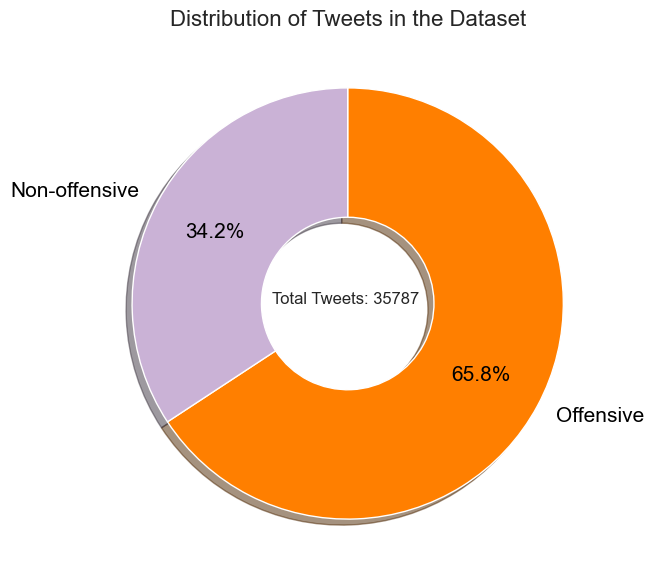

In [29]:
plt.figure(figsize = (7,7))
sorted_counts = df['label'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.6},
       autopct='%1.1f%%', pctdistance = 0.7, textprops = {'color': 'black', 'fontsize' : 15}, shadow = True,
        colors = sns.color_palette("Paired")[7:])
plt.text(x = -0.35, y = 0, s = 'Total Tweets: {}'.format(df.shape[0]))
plt.title('Distribution of Tweets in the Dataset', fontsize = 16);

In [30]:
df['label'] = df.label.map({'Offensive': 1, 'Non-offensive': 0})

### Implementing a training and predicting Pipeline
***

Separate training and testing data:

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df['full_text'], 
                                                    df['label'], 
                                                    random_state=42)

print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 35787
Number of rows in the training set: 26840
Number of rows in the test set: 8947


Vectorize the data:

In [32]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer(stop_words = 'english', lowercase = True)

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

In [33]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    start_train = tm.time()  # Using the alias tm
    model.fit(X_train, y_train)
    end_train = tm.time()  # Using the alias tm
    
    start_pred = tm.time()  # Using the alias tm
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    end_pred = tm.time()  # Using the alias tm
    
    results = {
        'Algorithm': model.__class__.__name__,
        'Accuracy: Test': accuracy_score(y_test, y_pred_test),
        'Precision: Test': precision_score(y_test, y_pred_test, average='weighted'),
        'Recall: Test': recall_score(y_test, y_pred_test, average='weighted'),
        'F1 Score: Test': f1_score(y_test, y_pred_test, average='weighted'),
        'Prediction Time': end_pred - start_pred,
        'Accuracy: Train': accuracy_score(y_train, y_pred_train),
        'Precision: Train': precision_score(y_train, y_pred_train, average='weighted'),
        'Recall: Train': recall_score(y_train, y_pred_train, average='weighted'),
        'F1 Score: Train': f1_score(y_train, y_pred_train, average='weighted'),
        'Training Time': end_train - start_train
    }
    
    return pd.DataFrame([results])

In [34]:
import time as tm

In [35]:
# Logistic Regression
logistic_regression_results = evaluate_model(LogisticRegression(), training_data, y_train, testing_data, y_test)
print("Logistic Regression Results:\n", logistic_regression_results)

Logistic Regression Results:
             Algorithm  Accuracy: Test  Precision: Test  Recall: Test  \
0  LogisticRegression        0.926456         0.929402      0.926456   

   F1 Score: Test  Prediction Time  Accuracy: Train  Precision: Train  \
0        0.927115              0.0         0.978428          0.978719   

   Recall: Train  F1 Score: Train  Training Time  
0       0.978428         0.978492       0.706435  


In [36]:
sgd_classifier_results = evaluate_model(SGDClassifier(), training_data, y_train, testing_data, y_test)
print("\nSGD Classifier Results:\n", sgd_classifier_results)


SGD Classifier Results:
        Algorithm  Accuracy: Test  Precision: Test  Recall: Test  \
0  SGDClassifier        0.927573         0.929952      0.927573   

   F1 Score: Test  Prediction Time  Accuracy: Train  Precision: Train  \
0        0.928146              0.0         0.982154          0.982378   

   Recall: Train  F1 Score: Train  Training Time  
0       0.982154         0.982201       0.085311  


In [37]:
# Decision Tree Classifier
decision_tree_results = evaluate_model(DecisionTreeClassifier(), training_data, y_train, testing_data, y_test)
print("\nDecision Tree Classifier Results:\n", decision_tree_results)


Decision Tree Classifier Results:
                 Algorithm  Accuracy: Test  Precision: Test  Recall: Test  \
0  DecisionTreeClassifier        0.922097         0.923367      0.922097   

   F1 Score: Test  Prediction Time  Accuracy: Train  Precision: Train  \
0        0.922494         0.044864         0.998845          0.998848   

   Recall: Train  F1 Score: Train  Training Time  
0       0.998845         0.998845       9.758729  


In [38]:
# Linear SVC
linear_svc_results = evaluate_model(LinearSVC(), training_data, y_train, testing_data, y_test)
print("\nLinear SVC Results:\n", linear_svc_results)


Linear SVC Results:
    Algorithm  Accuracy: Test  Precision: Test  Recall: Test  F1 Score: Test  \
0  LinearSVC        0.916732         0.917955      0.916732        0.917133   

   Prediction Time  Accuracy: Train  Precision: Train  Recall: Train  \
0              0.0         0.997019          0.997022       0.997019   

   F1 Score: Train  Training Time  
0          0.99702       0.767524  


In [39]:
results = pd.concat([logistic_regression_results, sgd_classifier_results, decision_tree_results, linear_svc_results])

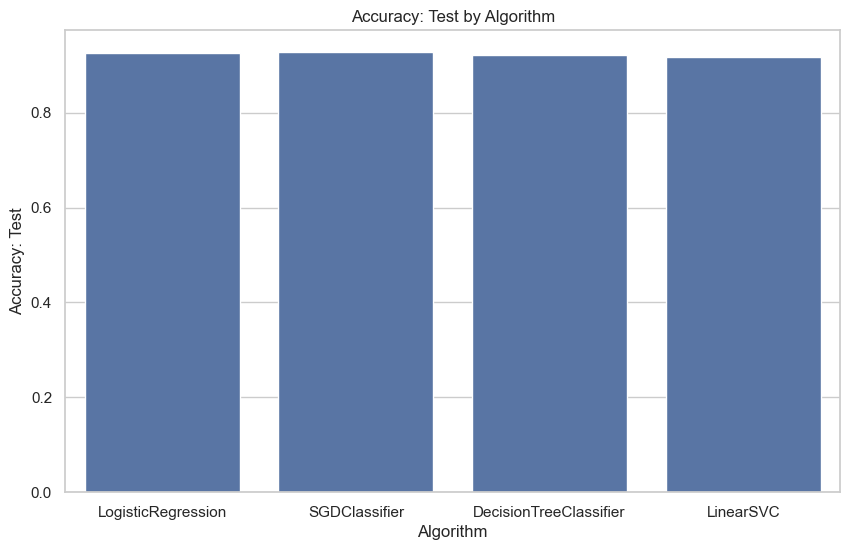

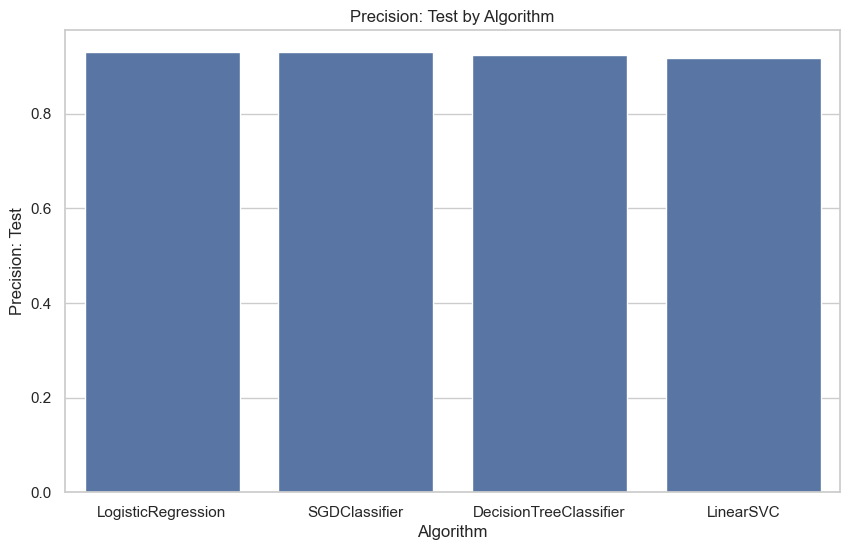

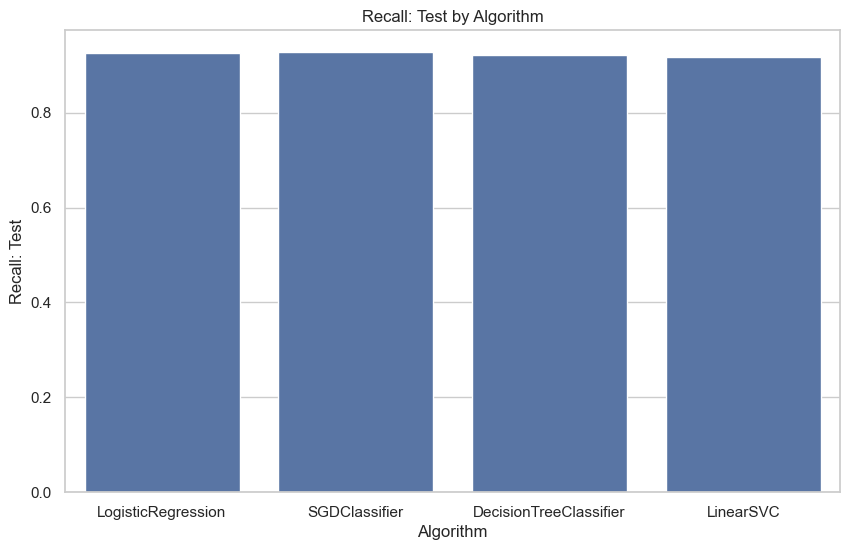

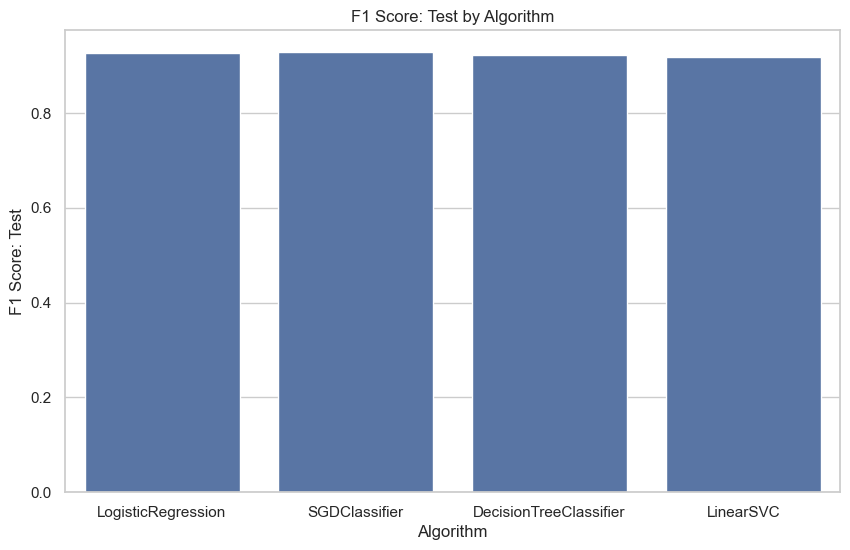

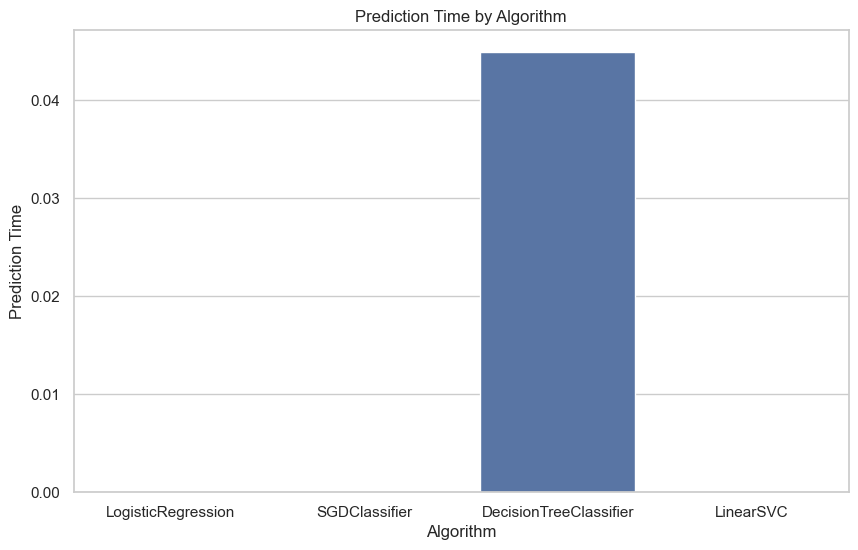

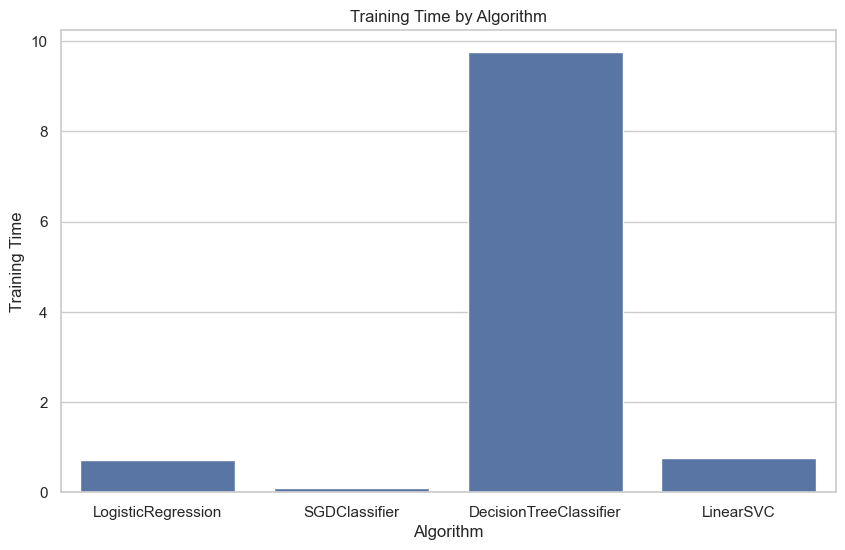

In [40]:
# Set the seaborn style
sns.set(style="whitegrid")

metrics = ['Accuracy: Test', 'Precision: Test', 'Recall: Test', 'F1 Score: Test', 'Prediction Time', 'Training Time']

# Plot each metric
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Algorithm', y=metric, data=results)
    plt.title(f'{metric} by Algorithm')
    plt.xlabel('Algorithm')
    plt.ylabel(metric)
    plt.show()


In [41]:
from sklearn.ensemble import VotingClassifier, StackingClassifier

In [42]:
# Create a Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression()), 
        ('sgd', SGDClassifier()), 
        ('dt', DecisionTreeClassifier()), 
        ('svc', LinearSVC())
    ],
    voting='hard'
)
voting_results = evaluate_model(voting_clf, training_data, y_train, testing_data, y_test)

# Create a Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression()), 
        ('sgd', SGDClassifier()), 
        ('dt', DecisionTreeClassifier()), 
        ('svc', LinearSVC())
    ],
    final_estimator=LogisticRegression()
)
stacking_results = evaluate_model(stacking_clf, training_data, y_train, testing_data, y_test)

# Combine results into a single DataFrame
results = pd.concat([
    logistic_regression_results,
    sgd_classifier_results,
    decision_tree_results,
    linear_svc_results,
    voting_results,
    stacking_results
])


c:\Users\chinn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [43]:
print(results)

                Algorithm  Accuracy: Test  Precision: Test  Recall: Test  \
0      LogisticRegression        0.926456         0.929402      0.926456   
0           SGDClassifier        0.927573         0.929952      0.927573   
0  DecisionTreeClassifier        0.922097         0.923367      0.922097   
0               LinearSVC        0.916732         0.917955      0.916732   
0        VotingClassifier        0.927909         0.931375      0.927909   
0      StackingClassifier        0.931374         0.932809      0.931374   

   F1 Score: Test  Prediction Time  Accuracy: Train  Precision: Train  \
0        0.927115         0.000000         0.978428          0.978719   
0        0.928146         0.000000         0.982154          0.982378   
0        0.922494         0.044864         0.998845          0.998848   
0        0.917133         0.000000         0.997019          0.997022   
0        0.928623         0.321859         0.987332          0.987676   
0        0.931773         0.0